In [176]:
import tensorflow
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import mglearn
from sklearn.svm import SVC
from sklearn import metrics

In [177]:
data = np.load('./data/olivetti_faces.npy')
target = np.load('./data/olivetti_faces_target.npy')

In [178]:
print(f"There are {len(data)} images in the dataset")
print(f"There are {len(np.unique(target))} unique targets in the dataset")
print(f"Size of each image is {data.shape[1]}x{data.shape[2]}")
print(f"Pixel values were scaled to [0,1] interval. e.g:{data[0][0,:4]}")

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [179]:
print(data.shape)
print(target.shape)
print(target)
print(64*64)

(400, 64, 64)
(400,)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32

In [180]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


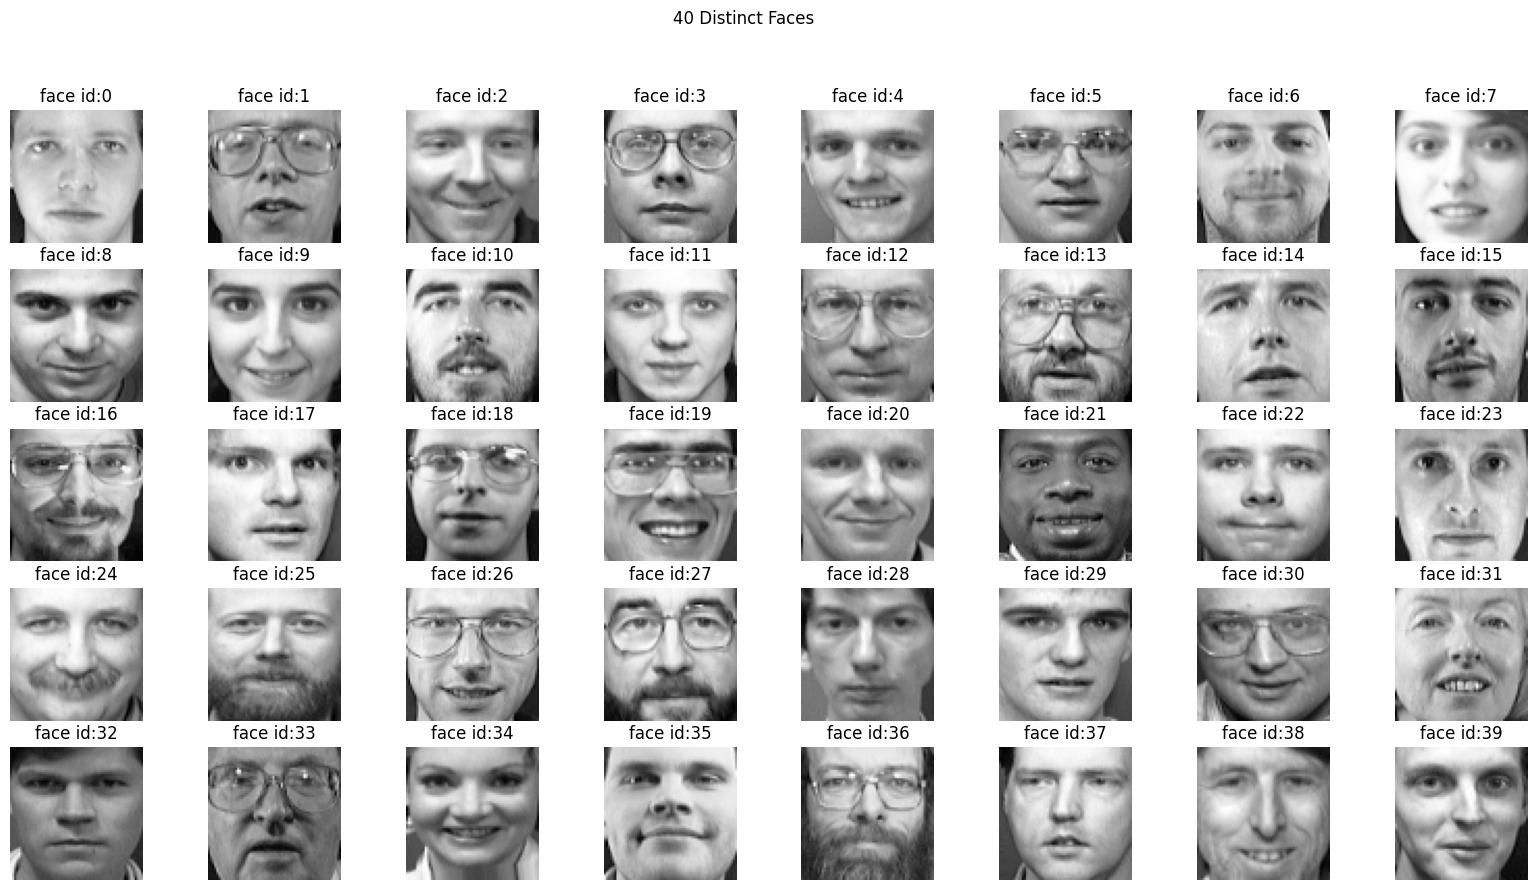

In [181]:
def show_face_of_40_distinct(images, unique_ids):
    fig, ax = plt.subplots(5,8,figsize=(20,10))
    ax=ax.flatten()
    
    for unique_id in unique_ids:
        image_idx = unique_id * 10
        ax[unique_id].imshow(images[image_idx], cmap='gray')
        ax[unique_id].set_title(f"face id:{unique_id}")
        ax[unique_id].axis('off')
    plt.suptitle("40 Distinct Faces")

show_face_of_40_distinct(data, np.unique(target))

[28 36 33 29 26 19  3 27 16  4]
10


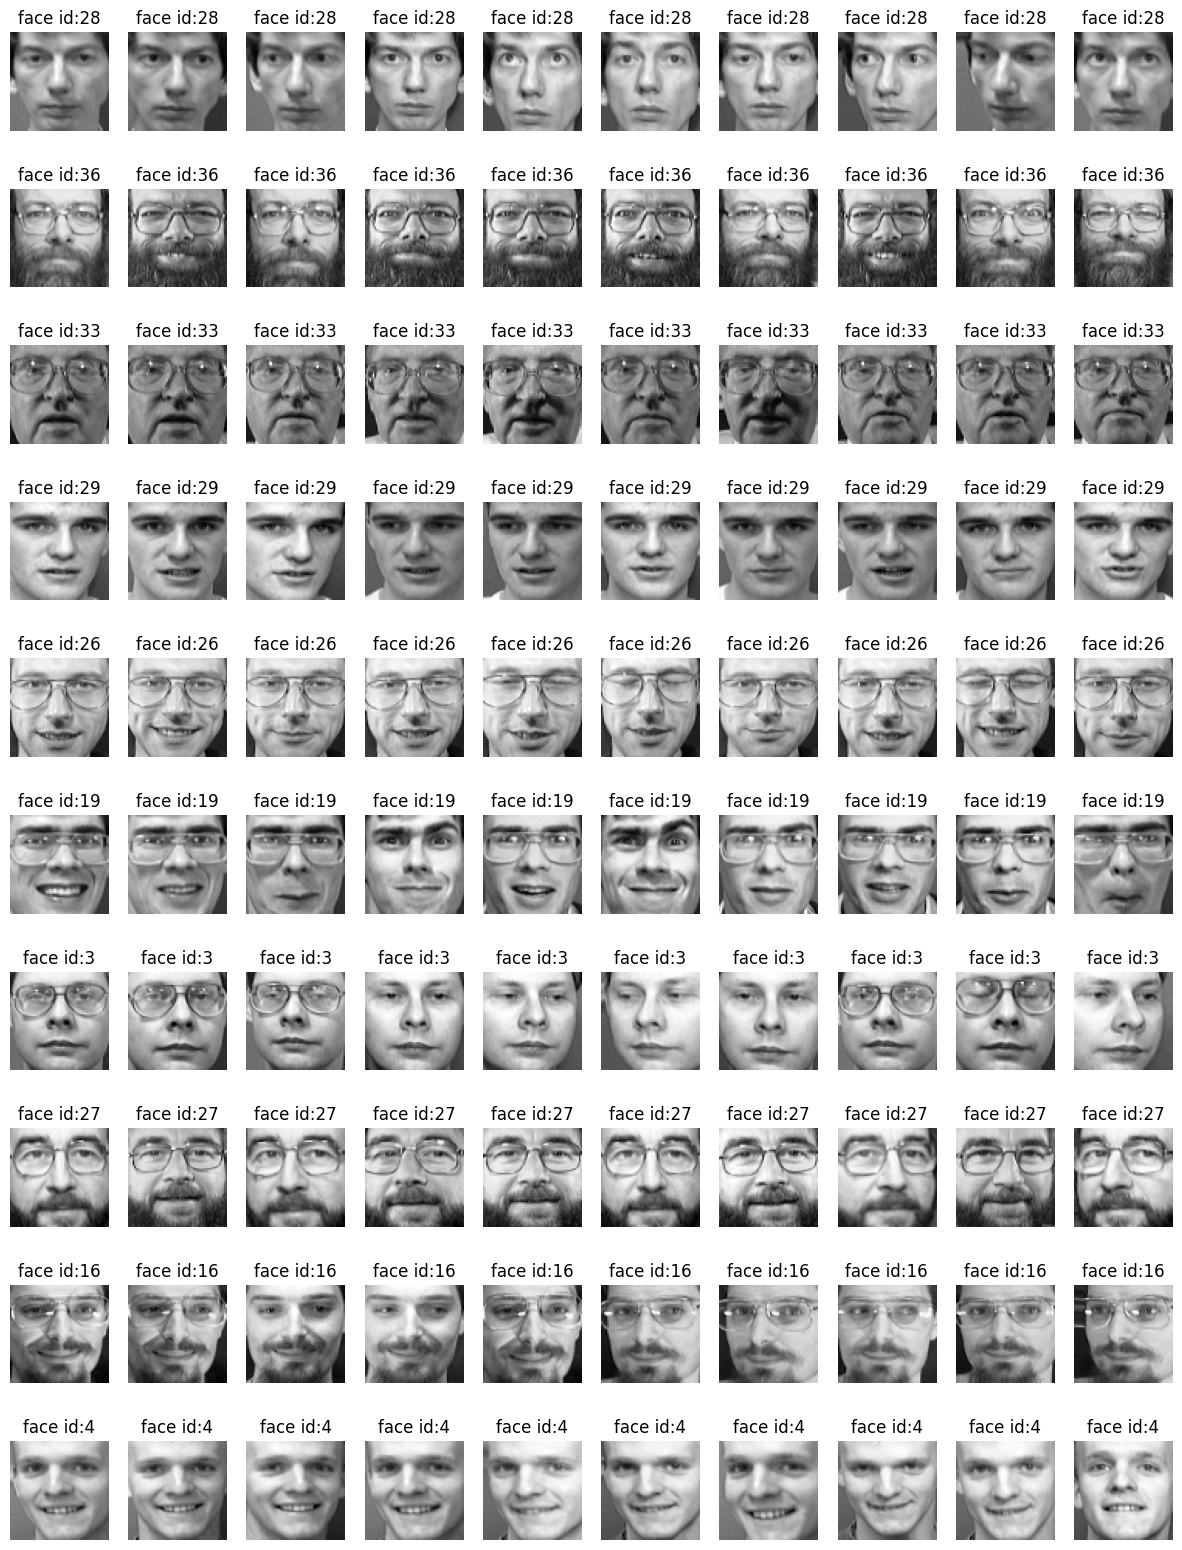

In [182]:
def show_10_face_of_n_subjects(images,subject_ids):
    cols = 10
    rows = len(subject_ids)
    print(rows)
    fig, ax = plt.subplots(rows,cols,figsize=(15,20))
    
    for idx, value in enumerate(subject_ids):
        for j in range(cols):
            img_idx = value*10 + j
            ax[idx,j].imshow(images[img_idx], cmap='gray')
            ax[idx,j].axis('off')
            ax[idx,j].set_title(f"face id:{value}")

    # plt.suptitle(f"{len(subject_ids)} Random Faces")        
    
subject_ids = np.random.randint(0,40,10)
print(subject_ids)
show_10_face_of_n_subjects(data, subject_ids)

In [183]:
# convert data to 1D
X = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))
print('X shape:', X.shape)

X shape: (400, 4096)


In [184]:
# stratify=target ensures balanced distribution of classes in train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2,stratify=target, random_state=42,shuffle=True)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (320, 4096)
x_test shape: (80, 4096)


In [185]:
print('class: ',len(np.unique(y_train)))

class:  40


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

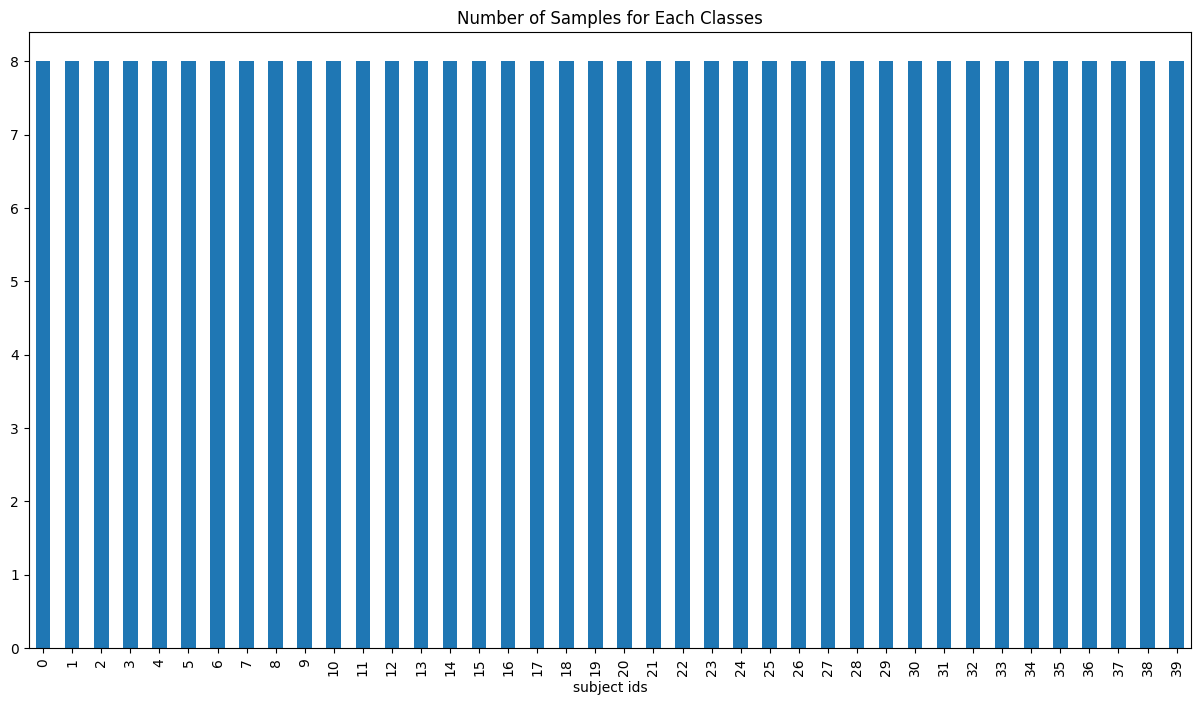

In [186]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

Phương pháp học máy được chia thành hai: học có giám sát và học không giám sát. Trong học có giám sát, tập dữ liệu được chia thành hai phần chính: “dữ liệu” và “đầu ra”. Dữ liệu chứa các giá trị của mẫu trong tập dữ liệu, trong khi 'đầu ra' chứa lớp (để phân loại) hoặc giá trị đích (để hồi quy). Trong học không giám sát, tập dữ liệu chỉ bao gồm phần dữ liệu.

Học không giám sát thường được chia thành hai: chuyển đổi dữ liệu và phân cụm. Trong nghiên cứu này, việc chuyển đổi dữ liệu sẽ được thực hiện bằng cách sử dụng phương pháp học không giám sát. Các phương pháp chuyển đổi không giám sát cho phép máy tính và con người giải thích dữ liệu dễ dàng hơn.

Các ứng dụng chuyển đổi không giám sát phổ biến nhất là giảm kích thước dữ liệu. Trong quá trình giảm kích thước, kích thước của dữ liệu sẽ giảm.

Phân tích thành phần nguyên tắc (PCA) là một phương pháp cho phép dữ liệu được biểu diễn ở kích thước nhỏ hơn. Theo phương pháp này, dữ liệu được chuyển đổi sang các thành phần mới và kích thước của dữ liệu được giảm đi bằng cách chọn các thành phần quan trọng nhất.

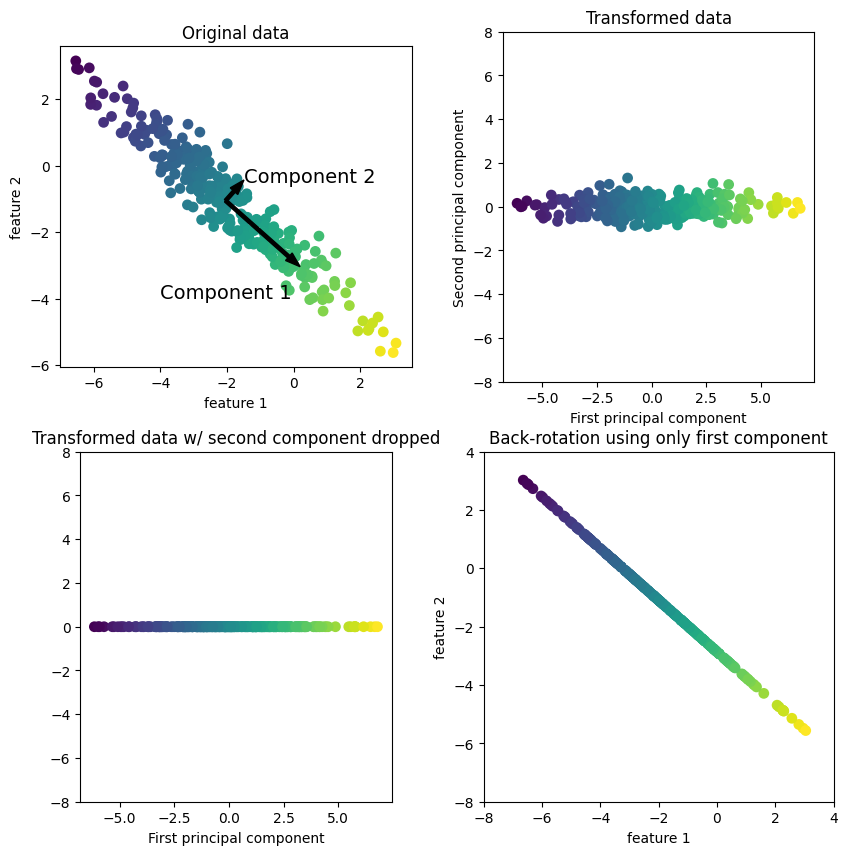

In [187]:
mglearn.plots.plot_pca_illustration()

In [188]:
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

In [189]:
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)
print(X_pca[0])

original shape:  (400, 4096)
transformed shape:  (400, 2)
[-6.432613   -0.70366836]


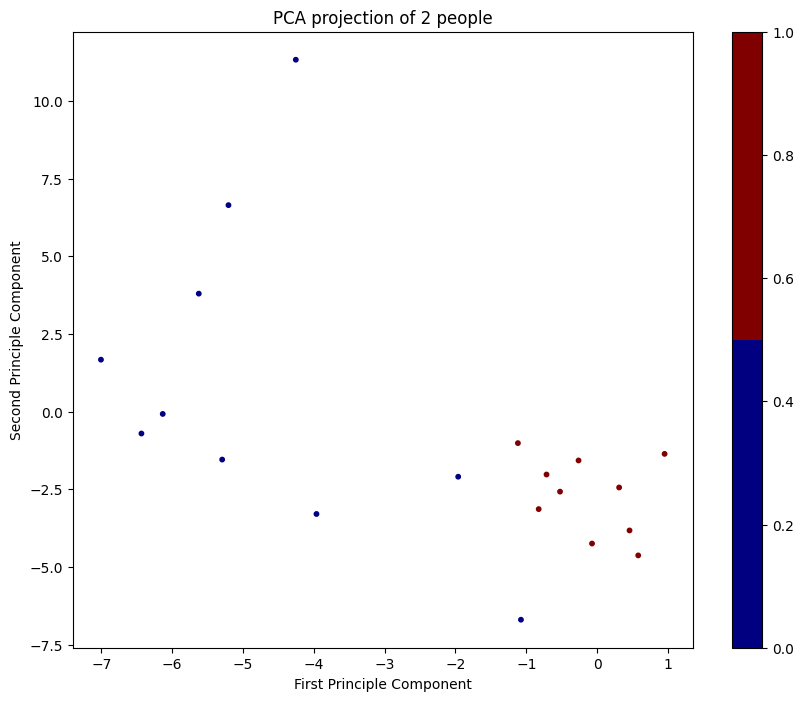

In [190]:
number_of_people=2
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

### tìm n_components tối ưu

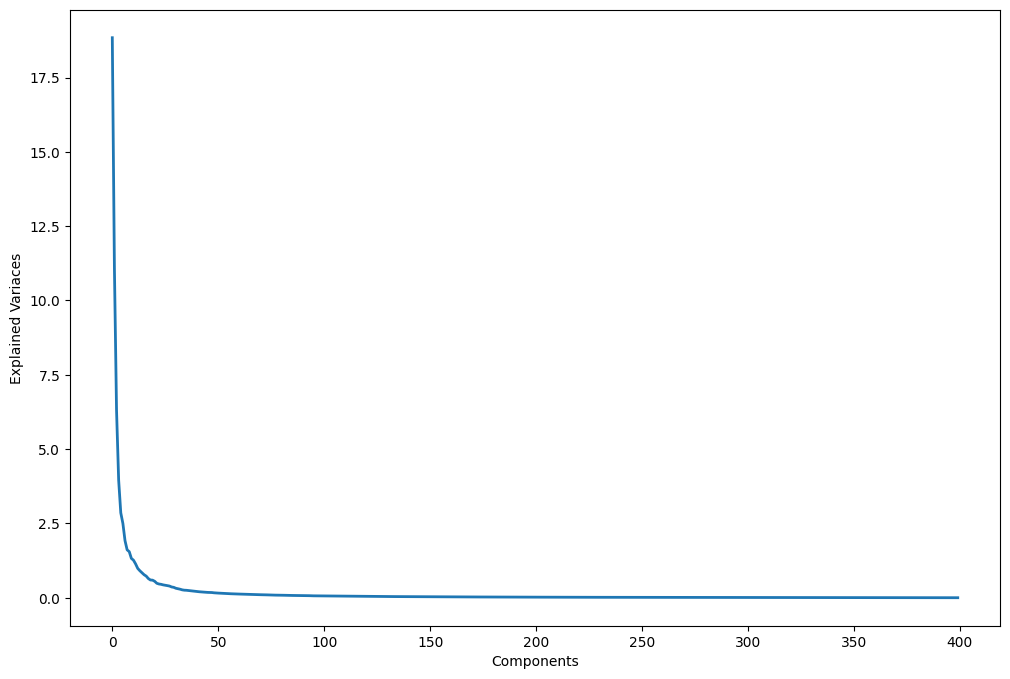

In [191]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [192]:
n_components = 90
print(x_train.shape)

(320, 4096)


In [193]:
pca = PCA(n_components=n_components, whiten=True).fit(x_train)

In [200]:
print(pca.components_.shape)
print(pca.mean_.shape)

(90, 4096)
(4096,)


### Show ảnh sau khi giảm kích thước

Text(0.5, 1.0, 'Average Face')

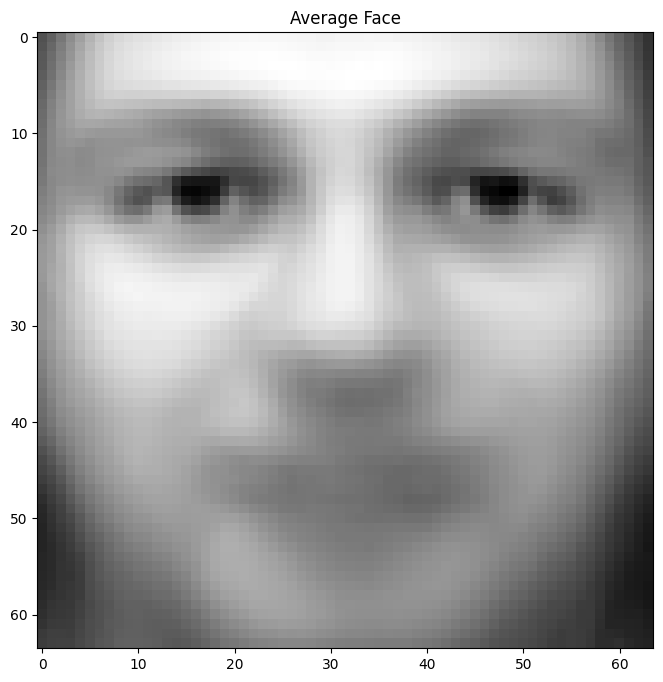

In [195]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title('Average Face')

90


Text(0.5, 0.98, 'All Eigen Faces')

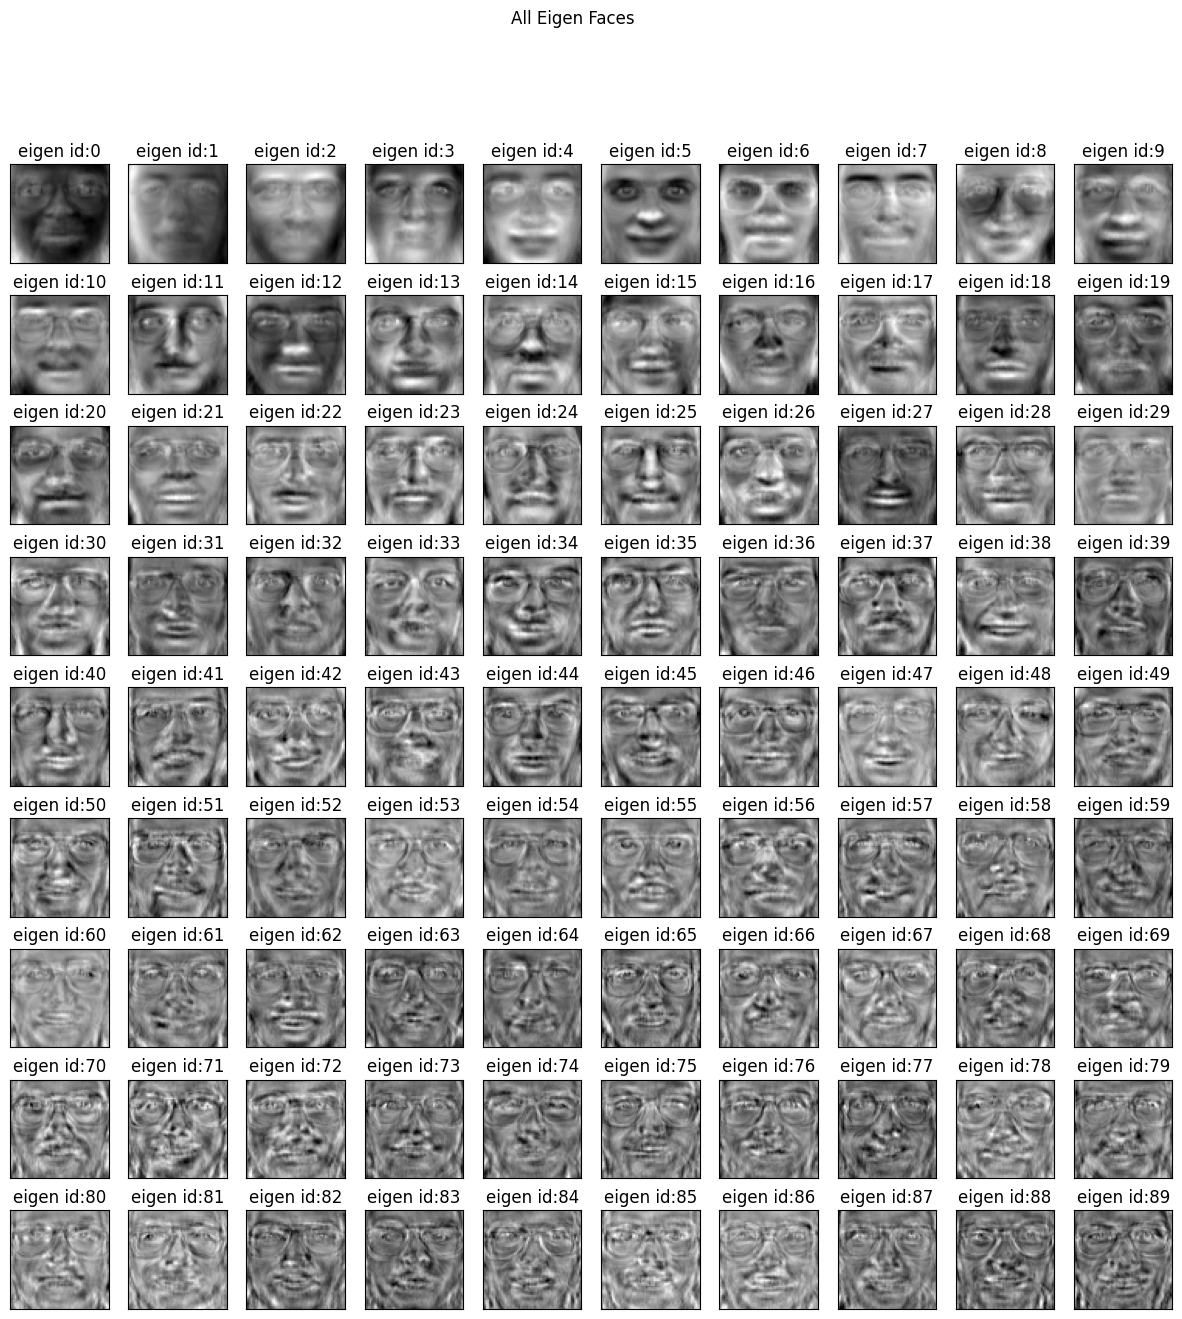

In [196]:
number_of_eigenfaces=len(pca.components_)
print(number_of_eigenfaces)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [197]:
X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(320, 90)
(80, 90)


### Classify ảnh sau khi giảm kích thước

In [198]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("classification report:\n{}".format(metrics.classification_report(y_test, y_pred)))

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
    

In [199]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("classification report:\n{}".format(metrics.classification_report(y_test, y_pred)))

classification report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
    